In [3]:
from copy import deepcopy
import datetime
import numpy as np
import pandas as pd
import os
import sys
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

This notebook replicates some results of _Lifecycle Investing_'s excel simulations, found on their website.

In [ ]:
W0 = 78540  # initial wealth
R_rf = 0.0038  # risk-free return
R_mm = 0.0038  # money market return
M = 0.05  # margin cushion (fraction of )
T_Fut = 0.252  # marginal tax on futures
T_mm = 0.33  # marginal tax on interest

FUT = W0/(1-T_fut)  # target futures position
MargCush = FUT*M  # margin cushion
IntInv=W0 - MargCush  # invest in interst-bearing asset
IntIncome = IntInv*R_mm*(1 - T_mm)  # after tax income from interest

In [50]:
R_EQ = np.arange(-0.05, 0.06, 0.01)

# Roth return ($)
RothRet = W0 * R_EQ

# Futures mark-to-market return (before taxes)
FutRet = FUT * (R_EQ - R_rf)

# futures return (after tax)
FutRetAfterTax = FutRet * (1-T_Fut)

# interest income (after-tax)
# IntIncome = IntIncome

# total
SynthRothInc = FutRetAfterTax + IntIncome

# synthetic Roth after-tax return (%)
SynthRothRet = SynthRothInc/W0

# return difference
SynthRothRet - R_EQ

array([-0.00142419, -0.00142419, -0.00142419, -0.00142419, -0.00142419,
       -0.00142419, -0.00142419, -0.00142419, -0.00142419, -0.00142419,
       -0.00142419])

In [51]:
SynthRothRet = (FUT*R_EQ + (W0 - FUT*(1+M))*R_rf)/W0
SynthRothRet

array([-0.06837914, -0.05501016, -0.04164118, -0.02827219, -0.01490321,
       -0.00153422,  0.01183476,  0.02520374,  0.03857273,  0.05194171,
        0.0653107 ])

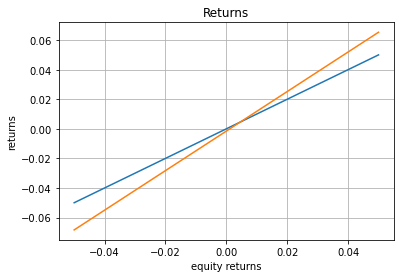

In [57]:
x = R_EQ
y1 = R_EQ
y2 = SynthRothRet

plt.plot(x,y1)
plt.plot(x,y2)

plt.title("Returns")
plt.xlabel("equity returns")
plt.ylabel("returns")

plt.grid()
# plt.legend()

plt.show() 